# Task:
Your task is to answer a series of questions about trends in crimes in Chicago for a reporter for the local newspaper.
- Stakeholder Questions to Answer (pick at least 3 topics) Select 3 or more of the following topics to analyze:

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os,glob
#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib import ticker
## Setting figures to timeseries-friendly
plt.rcParams['figure.figsize'] = (12,4)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_context("talk", font_scale=0.9)
# set random seed
SEED = 321
np.random.seed(SEED)
#display more columns
pd.set_option('display.max_columns',50)

### Load the Dataset

In [2]:
# Load data from files
crime_files = sorted(glob.glob('Data/Chicago/'+"*.csv"))
crime = pd.concat([pd.read_csv(f) for f in crime_files])
crime

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1316324,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.0,NaN,41.869008,-87.773947
1,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
2,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629
3,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
4,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...,...
193451,13229066,09/30/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,2412,24.0,50.0,42.003590,-87.701007
193452,13228561,09/30/2023 12:00:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1234,12.0,25.0,41.855034,-87.667440
193453,13231194,09/30/2023 12:00:00 AM,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,934,9.0,16.0,41.800675,-87.663547
193454,13228428,09/30/2023 12:00:00 AM,MOTOR VEHICLE THEFT,THEFT / RECOVERY - AUTOMOBILE,STREET,False,False,2511,25.0,36.0,41.933478,-87.796780


In [3]:
# Convert 'Date' column to datetime
date_format = "%m/%d/%Y %H:%M:%S %p"
crime['Datetime'] = pd.to_datetime(crime['Date'], format=date_format)
crime.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,Datetime
0,1316324,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.0,NaN,41.869008,-87.773947,2001-01-01 01:00:00
1,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919,2001-01-01 01:00:00
2,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629,2001-01-01 01:00:00
3,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534,2001-01-01 01:00:00
4,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513,2001-01-01 01:00:00


In [4]:
# Save final df
crime_orig = crime.set_index('Datetime')
crime_orig

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Datetime,,,,,,,,,,,,
2001-01-01 01:00:00,1316324,01/01/2001 01:00:00 PM,THEFT,OVER $500,STREET,False,False,1513,15.0,NaN,41.869008,-87.773947
2001-01-01 01:00:00,1310858,01/01/2001 01:00:00 PM,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,NaN,41.955619,-87.708919
2001-01-01 01:00:00,1312557,01/01/2001 01:00:00 PM,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,513,5.0,NaN,41.695025,-87.620629
2001-01-01 01:00:00,1311735,01/01/2001 01:00:00 AM,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,1632,16.0,NaN,41.938196,-87.800534
2001-01-01 01:00:00,1323691,01/01/2001 01:00:00 AM,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,False,False,1135,11.0,NaN,41.866694,-87.688513
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-30 12:00:00,13229066,09/30/2023 12:00:00 AM,THEFT,$500 AND UNDER,STREET,False,False,2412,24.0,50.0,42.003590,-87.701007
2023-09-30 12:00:00,13228561,09/30/2023 12:00:00 AM,BATTERY,SIMPLE,BAR OR TAVERN,False,False,1234,12.0,25.0,41.855034,-87.667440
2023-09-30 12:00:00,13231194,09/30/2023 12:00:00 AM,THEFT,$500 AND UNDER,VEHICLE NON-COMMERCIAL,False,False,934,9.0,16.0,41.800675,-87.663547


## Topic 1) Comparing Police Districts:
- Which district has the most crimes? Which has the least?

In [5]:
# Resample 'district' data to monthly
district_ts = crime_orig.groupby('District').resample('BYS').size()
district_ts

District  Datetime  
1.0       2001-01-01    14861
          2002-01-01    17974
          2003-01-01    17571
          2004-01-01    17698
          2005-01-03    17641
                        ...  
31.0      2019-01-01        7
          2020-01-01        4
          2021-01-01       15
          2022-01-03       15
          2023-01-02       12
Length: 530, dtype: int64

In [6]:
# Check index of new df
district_ts.head().index

MultiIndex([(1.0, '2001-01-01'),
            (1.0, '2002-01-01'),
            (1.0, '2003-01-01'),
            (1.0, '2004-01-01'),
            (1.0, '2005-01-03')],
           names=['District', 'Datetime'])

In [7]:
# Unstack 'District' index for column
unstacked = district_ts.unstack(level=0)
unstacked

District,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0,31.0
Datetime,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,14861.0,35407.0,24312.0,25121.0,20007.0,25488.0,26602.0,31355.0,24090.0,19651.0,27659.0,24891.0,22547.0,20122.0,16018.0,14488.0,22527.0,22759.0,9989.0,NaN,14956.0,15111.0,27930.0,NaN
2002-01-01,17974.0,27048.0,23556.0,25833.0,21096.0,25315.0,28126.0,32100.0,25315.0,19462.0,30065.0,24682.0,22389.0,20443.0,16065.0,14430.0,22315.0,22903.0,9153.0,NaN,15675.0,15021.0,27833.0,9.0
2003-01-01,17571.0,25100.0,23580.0,26146.0,19951.0,25461.0,27865.0,31709.0,25300.0,19086.0,30020.0,25001.0,20596.0,21333.0,15877.0,13976.0,20380.0,21486.0,8262.0,1.0,14961.0,13935.0,28377.0,11.0
2004-01-01,17698.0,23888.0,24420.0,26338.0,20640.0,26273.0,28926.0,31596.0,23856.0,20535.0,29511.0,24366.0,19151.0,20398.0,14645.0,13152.0,20274.0,21171.0,8414.0,3.0,15538.0,14494.0,27180.0,6.0
2005-01-03,17641.0,21907.0,24163.0,24924.0,20327.0,25548.0,27411.0,31327.0,22812.0,19187.0,29145.0,22218.0,16913.0,19081.0,14191.0,13107.0,18731.0,19478.0,8721.0,NaN,15088.0,14295.0,26421.0,5.0
2006-01-02,16892.0,20111.0,23487.0,25863.0,19858.0,25054.0,27352.0,32104.0,23412.0,18232.0,28219.0,21978.0,17197.0,20337.0,14219.0,13005.0,18348.0,18809.0,8146.0,NaN,14789.0,14121.0,24719.0,7.0
2007-01-01,15651.0,19369.0,23116.0,25462.0,20822.0,26997.0,27460.0,31107.0,21720.0,18339.0,26559.0,20918.0,16360.0,20352.0,14155.0,11934.0,18150.0,18592.0,7302.0,NaN,14980.0,12997.0,24731.0,15.0
2008-01-01,15851.0,17780.0,21621.0,24979.0,19245.0,26045.0,27430.0,30859.0,20960.0,17726.0,25694.0,20506.0,16526.0,19126.0,14994.0,12564.0,17732.0,18513.0,7022.0,NaN,14297.0,12851.0,24801.0,22.0
2009-01-01,13396.0,16759.0,20556.0,23055.0,18013.0,23352.0,23390.0,28639.0,19404.0,15924.0,23462.0,18145.0,15734.0,17933.0,13572.0,11654.0,16077.0,17052.0,6299.0,NaN,13553.0,11849.0,24987.0,22.0


In [8]:
# Find the sum of all crimes per district
all_crimes = unstacked.sum()
all_crimes

District
1.0     321393.0
2.0     374951.0
3.0     400903.0
4.0     448815.0
5.0     349900.0
6.0     462417.0
7.0     455490.0
8.0     531010.0
9.0     385859.0
10.0    340631.0
11.0    506578.0
12.0    392925.0
14.0    305576.0
15.0    337606.0
16.0    264976.0
17.0    228207.0
18.0    355431.0
19.0    355974.0
20.0    140199.0
21.0         4.0
22.0    258913.0
24.0    239474.0
25.0    449378.0
31.0       248.0
dtype: float64

### Plot police district data

In [9]:
# Create x-axis tick locators and formatters for 
# Create major x-axis ticks
major_loc = mdates.YearLocator(3)
major_fmt = mdates.DateFormatter("%Y")
# Create minor ticks x-axis
minor_loc = mdates.YearLocator()

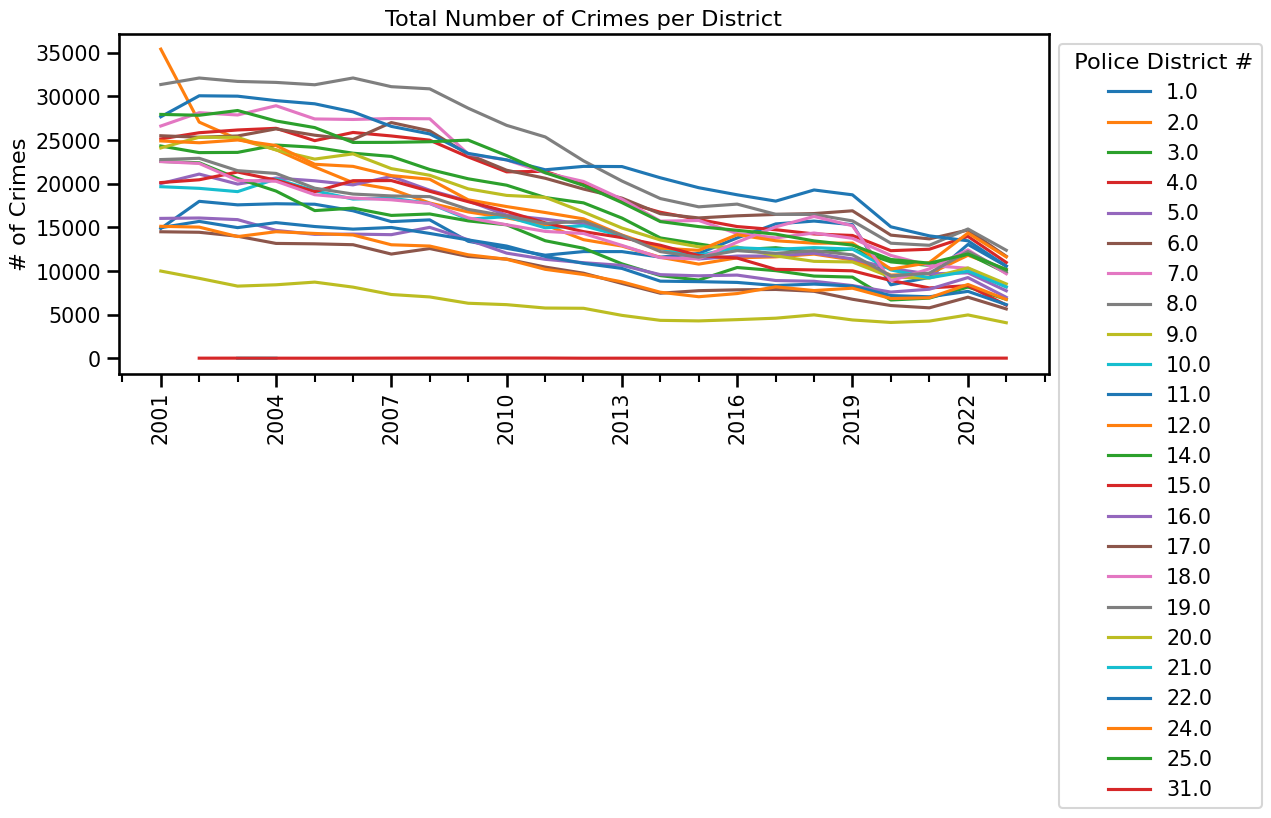

In [10]:
# Plot data
fig, ax=plt.subplots(figsize=(12,5))
ax.plot(unstacked)
ax.set(title='Total Number of Crimes per District', ylabel='# of Crimes')

# Customize major x-axis ticks
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor x-axis tick
ax.xaxis.set_minor_locator(minor_loc)

# Final Adjustments
ax.legend(unstacked, title=' Police District #', bbox_to_anchor=[1,1])
fig.autofmt_xdate(which='major', rotation=90, ha='center');

- According to the plot above, the police district with most crimes is District #8 with 531010 total crimes.
- The police district with the amount of crimes is District #21 with 4 total crimes.

## Topic 2) Crimes Across the Years:
- Is the total number of crimes increasing or decreasing across the years?
- Are there any individual crimes that are doing the opposite (e.g decreasing when overall crime is increasing or vice-versa)?

### Is the total number of crimes increasing or decreasing across the years?

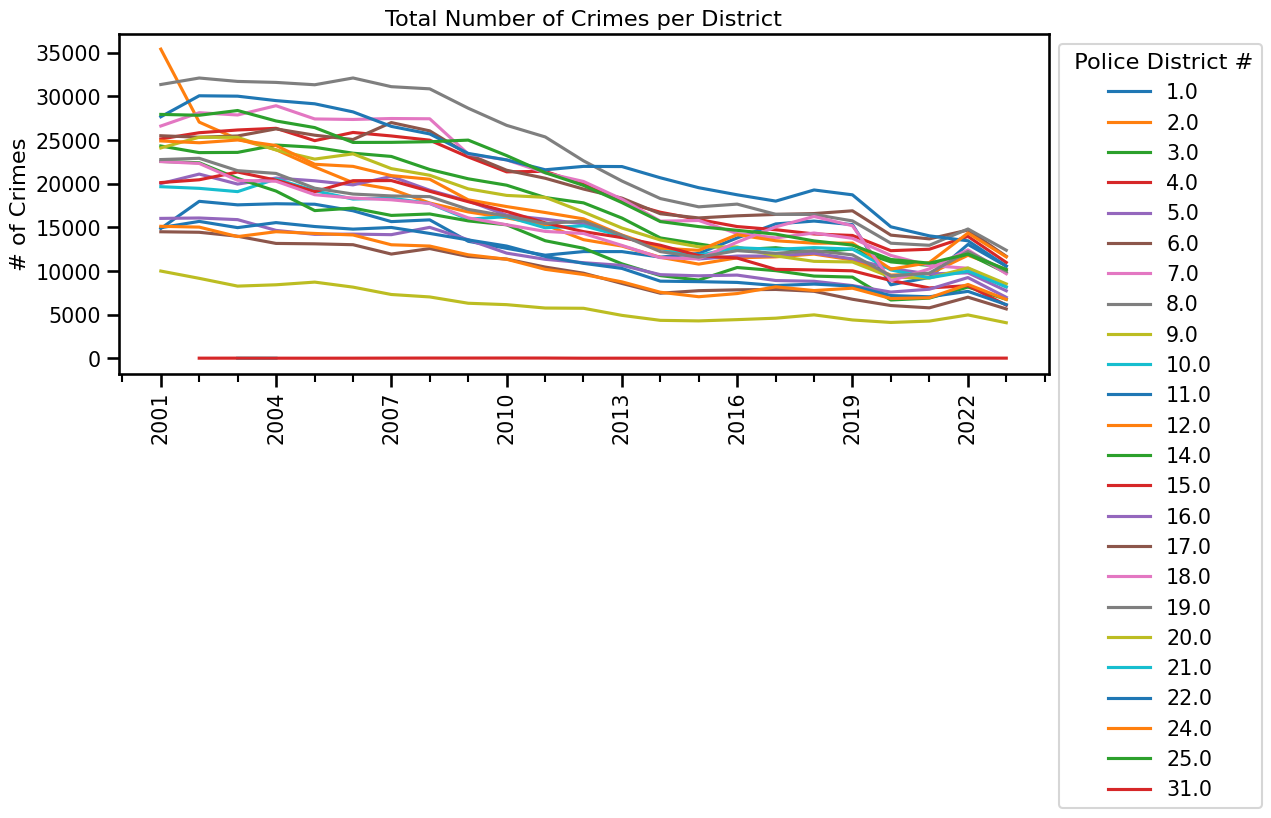

In [11]:
# Plot data
fig, ax=plt.subplots(figsize=(12,5))
ax.plot(unstacked)
ax.set(title='Total Number of Crimes per District', ylabel='# of Crimes')

# Customize major x-axis ticks
ax.xaxis.set_major_locator(major_loc)
ax.xaxis.set_major_formatter(major_fmt)

# Customize minor x-axis tick
ax.xaxis.set_minor_locator(minor_loc)

# Final Adjustments
ax.legend(unstacked, title=' Police District #', bbox_to_anchor=[1,1])
fig.autofmt_xdate(which='major', rotation=90, ha='center');

- Based off the plot above from question 1, the total number of crimes appear to be decreasing across the years.

## Topic 5) Comparing Holidays:
- Are there any holidays that show an increase in the # of crimes?
- Are there any holidays that show a decrease in the # of crimes?

### Supplemental Data: Holiday Data
- Check the lesson on "Feature Engineering: Holidays" to see how to use the Python 'holidays' package to add holidays to your dataset.